In [ ]:
import os
print(os.listdir(("/content/drive/My Drive/DR_Messidor_Dataset")))

['test', 'train', 'LossInceptionV3.png', 'LossXception.png', 'AccuracyXception.png', 'PrecisionXception.png', 'RecallXception.png', 'AucXception.png', 'ConfusionMatrix_Xception.png', 'ConfusionMatrix_Xception_train.png', 'LossMobileNetV2.png', 'AccuracyMobileNetV2.png', 'RecallMobileNetV2.png', 'AucMobileNetV2.png', 'PrecisionMobileNetV2.png', 'ConfusionMatrix_MobileNetV2_train.png', 'ConfusionMatrix_MobileNetV2_test.png', 'LossDenseNet121.png', 'AccuracyDenseNet121.png', 'RecallDenseNet121.png', 'AucDenseNet121.png', 'PrecisionDenseNet121.png', 'ConfusionMatrix_DenseNet121_train.png', 'ConfusionMatrix_DenseNet121_test.png']


In [ ]:
import tensorflow as tf
import keras
METRICS = [
      tf.keras.metrics.BinaryAccuracy(name='accuracy'),
      tf.keras.metrics.Precision(name='precision'),
      tf.keras.metrics.Recall(name='recall'),  
      tf.keras.metrics.AUC(name='auc'),
]

In [ ]:
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras import optimizers
from tensorflow.keras import backend as K
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import ModelCheckpoint
import numpy as np
import PIL
import matplotlib.pyplot as plt
import json
from IPython.display import Image as disp_image 
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
img_height = 256
img_width = 256
channels = 3
batch_size = 8
epochs = 30

train_datagen = ImageDataGenerator(rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

training_set = train_datagen.flow_from_directory(
    '/content/drive/My Drive/DR_Messidor_Dataset/train',
     target_size = (img_height, img_width),
     batch_size = batch_size,
     class_mode = 'binary',
     subset = 'training',
     shuffle=True)



test_set = test_datagen.flow_from_directory(
    '/content/drive/My Drive/DR_Messidor_Dataset/test',
     target_size = (img_height, img_width),
     batch_size = batch_size,
     shuffle = False,
     class_mode = 'binary')

print(training_set.class_indices)

In [ ]:
model = tf.keras.applications.InceptionResNetV2(weights = "imagenet", 
include_top=False, input_shape = (img_width, img_height, channels),classifier_activation="softmax")

219062272/219055592 [==============================] - 2s 0us/step


In [ ]:
for layer in model.layers[:-5]:
    layer.trainable = False

top_model = Sequential()
top_model.add(model)
top_model.add(Flatten())
top_model.add(Dense(256, activation='relu'))
top_model.add(Dropout(0.5))
top_model.add(Dense(1, activation='sigmoid'))

print(model.summary())
print(top_model.summary())

Model: "inception_resnet_v2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 127, 127, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 127, 127, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 127, 127, 32) 0           batch_normalization[0][0]        
________________________________________________________________________________

In [ ]:
top_model.compile(loss='binary_crossentropy',
                  optimizer=optimizers.RMSprop(learning_rate=1e-4, decay=1e-6),
                  metrics=METRICS)

history = top_model.fit(
          training_set,
          steps_per_epoch=training_set.n // batch_size,
          epochs=30,
          validation_data=test_set,
          validation_steps=test_set.n // batch_size)

Epoch 1/30
38/38 [==============================] - 159s 4s/step - loss: 0.4379 - accuracy: 0.8047 - precision: 0.7970 - recall: 0.7737 - auc: 0.8811 - val_loss: 0.5727 - val_accuracy: 0.8625 - val_precision: 0.8036 - val_recall: 1.0000 - val_auc: 0.9146
Epoch 2/30
38/38 [==============================] - 158s 4s/step - loss: 0.4656 - accuracy: 0.7912 - precision: 0.7955 - recall: 0.7500 - auc: 0.8767 - val_loss: 0.3358 - val_accuracy: 0.8125 - val_precision: 1.0000 - val_recall: 0.6667 - val_auc: 0.9956
Epoch 3/30
38/38 [==============================] - 156s 4s/step - loss: 0.4476 - accuracy: 0.8249 - precision: 0.8295 - recall: 0.7810 - auc: 0.8930 - val_loss: 0.3180 - val_accuracy: 0.8375 - val_precision: 1.0000 - val_recall: 0.7111 - val_auc: 0.9949
Epoch 4/30
38/38 [==============================] - 141s 4s/step - loss: 0.4358 - accuracy: 0.7811 - precision: 0.7983 - recall: 0.6985 - auc: 0.8850 - val_loss: 0.3265 - val_accuracy: 0.8625 - val_precision: 0.8036 - val_recall: 1.000

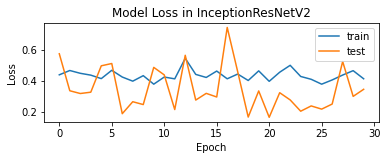

In [ ]:
import matplotlib.pyplot as pyplot
pyplot.subplot(211)
pyplot.title('Model Loss in InceptionResNetV2')
pyplot.ylabel('Loss')
pyplot.xlabel('Epoch')
InceptionResNetV2_train_loss = history.history['loss']
InceptionResNetV2_test_loss = history.history['val_loss']
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.savefig('/content/drive/My Drive/DR_Messidor_Dataset/LossInceptionResNetV2.png')
pyplot.legend()
pyplot.show()

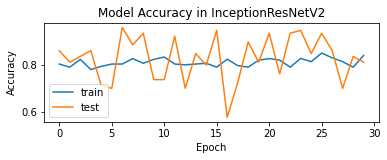

In [ ]:
import matplotlib.pyplot as pyplot
pyplot.subplot(211)
pyplot.title('Model Accuracy in InceptionResNetV2')
pyplot.ylabel('Accuracy')
pyplot.xlabel('Epoch')
InceptionResNetV2_train_accuracy = history.history['accuracy']
InceptionResNetV2_test_accuracy= history.history['val_accuracy']
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.savefig('/content/drive/My Drive/DR_Messidor_Dataset/AccuracyInceptionResNetV2.png')
pyplot.legend()
pyplot.show()

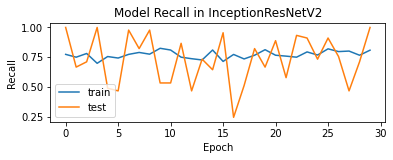

In [ ]:
import matplotlib.pyplot as pyplot
pyplot.subplot(211)
pyplot.title('Model Recall in InceptionResNetV2')
pyplot.ylabel('Recall')
pyplot.xlabel('Epoch')
InceptionResNetV2_train_recall = history.history['recall']
InceptionResNetV2_test_recall = history.history['val_recall']
pyplot.plot(history.history['recall'], label='train')
pyplot.plot(history.history['val_recall'], label='test')
pyplot.savefig('/content/drive/My Drive/DR_Messidor_Dataset/RecallInceptionResNetV2.png')
pyplot.legend()
pyplot.show()

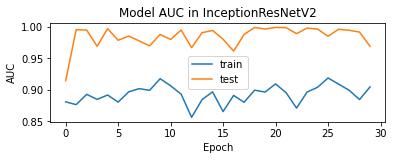

In [ ]:
import matplotlib.pyplot as pyplot
pyplot.subplot(211)
pyplot.title('Model AUC in InceptionResNetV2')
pyplot.ylabel('AUC')
pyplot.xlabel('Epoch')
InceptionResNetV2_train_auc = history.history['auc']
InceptionResNetV2_test_auc = history.history['val_auc']
pyplot.plot(history.history['auc'], label='train')
pyplot.plot(history.history['val_auc'], label='test')
pyplot.savefig('/content/drive/My Drive/DR_Messidor_Dataset/AucInceptionResNetV2.png')
pyplot.legend()
pyplot.show()

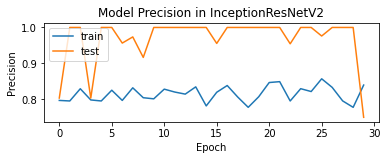

In [ ]:
import matplotlib.pyplot as pyplot
pyplot.subplot(211)
pyplot.title('Model Precision in InceptionResNetV2')
pyplot.ylabel('Precision')
pyplot.xlabel('Epoch')
InceptionResNetV2_train_precision = history.history['precision']
InceptionResNetV2_test_precision = history.history['val_precision']
pyplot.plot(history.history['precision'], label='train')
pyplot.plot(history.history['val_precision'], label='test')
pyplot.savefig('/content/drive/My Drive/DR_Messidor_Dataset/PrecisionInceptionResNetV2.png')
pyplot.legend()
pyplot.show()

In [ ]:
top_model.compile(optimizer='sgd',
              loss='mse',
              metrics=['TruePositives','TrueNegatives','FalsePositives','FalseNegatives'])
history = top_model.fit(training_set, validation_data = test_set, epochs=1, batch_size=32, verbose=2)

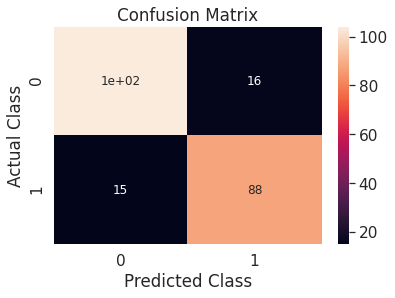

In [ ]:
import matplotlib.pyplot as pyplot
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

array = [[104,16],
         [15,88]]

df_cm = pd.DataFrame(array, range(2), range(2))

sn.set(font_scale=1.4) # for label size
sn.heatmap(df_cm, annot=True, annot_kws={"size": 12}) # font size
pyplot.title('Confusion Matrix')
pyplot.ylabel('Actual Class')
pyplot.xlabel('Predicted Class')
pyplot.savefig('/content/drive/My Drive/DR_Messidor_Dataset/ConfusionMatrix_InceptionResNetV2_train.png')
pyplot.show()

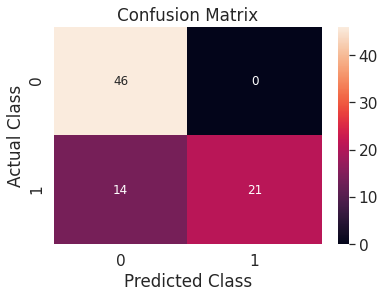

In [ ]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

array = [[46,0],
         [14,21]]

df_cm = pd.DataFrame(array, range(2), range(2))

sn.set(font_scale=1.4) # for label size
sn.heatmap(df_cm, annot=True, annot_kws={"size": 12}) # font size
pyplot.title('Confusion Matrix')
pyplot.ylabel('Actual Class')
pyplot.xlabel('Predicted Class')
pyplot.savefig('/content/drive/My Drive/DR_Messidor_Dataset/ConfusionMatrix_InceptionResNetV2_test.png')
pyplot.show()